## Amazon EC2 Spot Price Data analysis

Amazon web services provides different pricing models pay-per-use, fixed, and auction-based (spot price). It is seen that the spot price is a minimum of 5 times cheaper than the other pricing models but there is no guarentee that you will be given the instance. It depends on the price you bid. Thus, analysis of historical data for spot price inorder to efficiently (minimal cost) schedule the jobs is important.

boto3 is a package (Amazon Api) for pulling the price history. It provides trailing data upto 90 days.

In [1]:
# Importing the necessary packages.

import boto3
import pandas as pd
import datetime

Below is the code to pull the data. The key method is describe_spot_price_history. The handler takes input for the start and end times for the data you are interested in, instance type, region, Product Description. Remember amazon provides only the most recent 90 days of price history. The code is facilitated to provide a list of instance type if we are interested in multiple instance types and so with the product description.

In [2]:
def handler(event, context):
    start_time = event['start_time']
    end_time = event ['end_time']
    region = event['region']
    product_description = event['product_description']
    client = boto3.client('ec2', region_name=region)
    response = client.describe_spot_price_history(
        InstanceTypes=event['instances_list'],
        ProductDescriptions=product_description,
        StartTime=start_time,
        EndTime = end_time,
        MaxResults=10000
    )
    return response['SpotPriceHistory']

Below is the wrapper to the handler that takes the list of input values the user is interested in and invokes the handler with those input values.

In [3]:
def wrapper(instanceList, ProductDescriptionList, region):
    m4_list = []
    for i in range(1,90):
        output = (handler({
        'instances_list': instanceList,
        'start_time': datetime.datetime.now() - datetime.timedelta(i),
        'end_time': datetime.datetime.now() - datetime.timedelta(i-1),
        'product_description': ProductDescriptionList,
        'region': region
    }, ''))
        for j in range(0,len(output)):
            m4_list.append(output[j])

    df = pd.DataFrame(m4_list)
    df = df.drop_duplicates()
    df.reset_index(drop=True,inplace=True)
    return df


The wrapper pulls the price history and returns the data as a dataframe.

In [4]:
df = wrapper(['m4.large', 'm4.xlarge'],['Linux/UNIX (Amazon VPC)'], 'us-west-2')
df

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
0,us-west-2c,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 15:29:29+00:00
1,us-west-2a,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 15:29:29+00:00
2,us-west-2b,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 15:29:29+00:00
3,us-west-2c,m4.large,Linux/UNIX,0.030100,2018-01-17 12:29:47+00:00
4,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-17 12:29:47+00:00
5,us-west-2b,m4.large,Linux/UNIX,0.030100,2018-01-17 12:29:47+00:00
6,us-west-2c,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 00:29:48+00:00
7,us-west-2a,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 00:29:48+00:00
8,us-west-2b,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 00:29:48+00:00
9,us-west-2c,m4.large,Linux/UNIX,0.030100,2018-01-16 21:29:47+00:00


Simply by changing the arguments to the wrapper we can pull the required data. This two fold wrapper - handler is written with intent to increase the ease of integration to other interfaces. For example one can build a query interface on top of this and can have the data fetched. The integration is simplified. 

## Data Analysis

#### Getting to know about the data
There are different types of instance types provided by amazon. The case is similar with the Product Description. The different instance types, their use cases and specifications are posted on the amazon web services site. https://aws.amazon.com/ec2/instance-types/

More about spot instances can be learnt from https://aws.amazon.com/ec2/spot/

In [5]:
df.AvailabilityZone.value_counts()

us-west-2a    13184
us-west-2b    11883
us-west-2c     8234
Name: AvailabilityZone, dtype: int64

In [6]:
df.ProductDescription.value_counts()

Linux/UNIX    33301
Name: ProductDescription, dtype: int64

In [7]:
df.dtypes

AvailabilityZone                   object
InstanceType                       object
ProductDescription                 object
SpotPrice                          object
Timestamp             datetime64[ns, UTC]
dtype: object

In [11]:
## Select a particular criteria for analysis

uwta = df.loc[df['AvailabilityZone'] == 'us-west-2a']
uwta

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
1,us-west-2a,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 15:29:29+00:00
4,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-17 12:29:47+00:00
7,us-west-2a,m4.xlarge,Linux/UNIX,0.060200,2018-01-17 00:29:48+00:00
10,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-16 21:29:47+00:00
13,us-west-2a,m4.xlarge,Linux/UNIX,0.060200,2018-01-16 10:29:28+00:00
16,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-16 07:29:28+00:00
19,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-15 21:30:03+00:00
22,us-west-2a,m4.xlarge,Linux/UNIX,0.060200,2018-01-15 19:29:44+00:00
25,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-14 21:30:03+00:00
28,us-west-2a,m4.xlarge,Linux/UNIX,0.060200,2018-01-15 04:29:46+00:00


In [12]:
uwta_m4 = uwta.loc[uwta['InstanceType'] == 'm4.large']
uwta_m4

,AvailabilityZone,InstanceType,ProductDescription,SpotPrice,Timestamp
4,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-17 12:29:47+00:00
10,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-16 21:29:47+00:00
16,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-16 07:29:28+00:00
19,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-15 21:30:03+00:00
25,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-14 21:30:03+00:00
34,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-13 21:29:41+00:00
43,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-13 07:29:45+00:00
49,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-12 18:29:26+00:00
55,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-12 04:29:25+00:00
61,us-west-2a,m4.large,Linux/UNIX,0.030100,2018-01-11 13:29:26+00:00


In [13]:
## Setting the timestamp as index for plotting price trends
uwta_m4.set_index('Timestamp',inplace=True)

## dropping other columns 
for col in ['InstanceType', 'AvailabilityZone', 'ProductDescription']:
    uwta_m4 = uwta_m4.drop(col, axis=1)

## Converting the dtype of spot price to numberic
uwta_m4['SpotPrice'] = uwta_m4['SpotPrice'].apply(pd.to_numeric)

## resample the data with the required frequency
uwta_m4_day = uwta_m4.resample('D').mean()

## resampling with frequency hour
uwta_m4_hour = uwta_m4.resample('H').mean()

uwta_m4_hour

,SpotPrice
Timestamp,
2017-10-20 22:00:00+00:00,0.029750
2017-10-20 23:00:00+00:00,NaN
2017-10-21 00:00:00+00:00,NaN
2017-10-21 01:00:00+00:00,NaN
2017-10-21 02:00:00+00:00,0.029600
2017-10-21 03:00:00+00:00,0.029650
2017-10-21 04:00:00+00:00,NaN
2017-10-21 05:00:00+00:00,0.029650
2017-10-21 06:00:00+00:00,NaN


The resampled data has NaN values as there was no price history at that point of time. Amazon provides the price at a timestamp when there is a change in the price. For a continuous timeseries we can use the forward fill. The idea is the price remains same as current price till the next change is observed. 


In [14]:
uwta_m4_hour.fillna(method='ffill',inplace=True)
uwta_m4_hour

,SpotPrice
Timestamp,
2017-10-20 22:00:00+00:00,0.029750
2017-10-20 23:00:00+00:00,0.029750
2017-10-21 00:00:00+00:00,0.029750
2017-10-21 01:00:00+00:00,0.029750
2017-10-21 02:00:00+00:00,0.029600
2017-10-21 03:00:00+00:00,0.029650
2017-10-21 04:00:00+00:00,0.029650
2017-10-21 05:00:00+00:00,0.029650
2017-10-21 06:00:00+00:00,0.029650


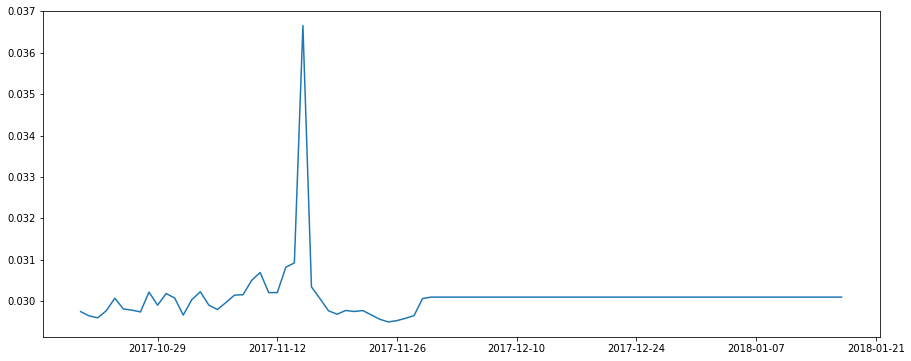

In [17]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## plotting for the day frequency; remember we did not fill the values for day frequency
plt.plot(uwta_m4_day)

Even though we did not fill in the values for the daily frequency we obtained a continuous which means the price changed atleast once in a day. Now below is the plot for the hourly frequency.

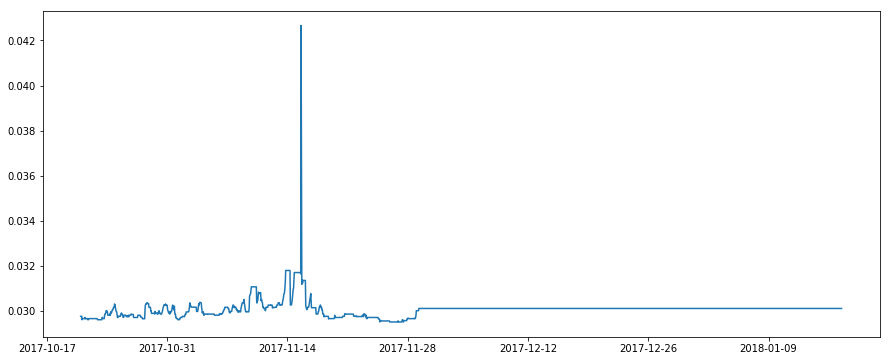

In [18]:
plt.plot(uwta_m4_hour)

Interpreting the data as timeseries we can plot the rolling statistics.

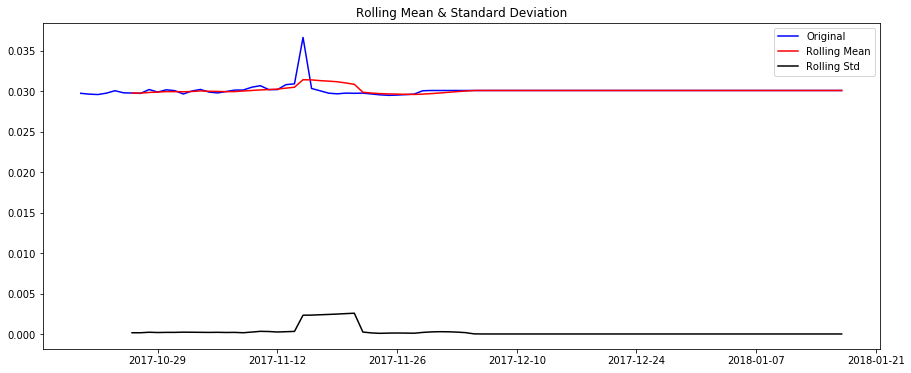

In [20]:
## Rolling statistics
rolmean = uwta_m4_day.rolling(window = 7).mean()
rolstd = uwta_m4_day.rolling(window = 7).std()

## plot the results
orig = plt.plot(uwta_m4_day, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


### Test for stationarity

We can test the data for stationarity using the dickney Fuller test.

In [22]:
## Dickney Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

x = uwta_m4_day.SpotPrice
x

Timestamp
2017-10-20 00:00:00+00:00    0.029750
2017-10-21 00:00:00+00:00    0.029647
2017-10-22 00:00:00+00:00    0.029600
2017-10-23 00:00:00+00:00    0.029770
2017-10-24 00:00:00+00:00    0.030073
2017-10-25 00:00:00+00:00    0.029814
2017-10-26 00:00:00+00:00    0.029785
2017-10-27 00:00:00+00:00    0.029743
2017-10-28 00:00:00+00:00    0.030221
2017-10-29 00:00:00+00:00    0.029905
2017-10-30 00:00:00+00:00    0.030186
2017-10-31 00:00:00+00:00    0.030079
2017-11-01 00:00:00+00:00    0.029667
2017-11-02 00:00:00+00:00    0.030037
2017-11-03 00:00:00+00:00    0.030229
2017-11-04 00:00:00+00:00    0.029905
2017-11-05 00:00:00+00:00    0.029800
2017-11-06 00:00:00+00:00    0.029970
2017-11-07 00:00:00+00:00    0.030148
2017-11-08 00:00:00+00:00    0.030157
2017-11-09 00:00:00+00:00    0.030504
2017-11-10 00:00:00+00:00    0.030694
2017-11-11 00:00:00+00:00    0.030209
2017-11-12 00:00:00+00:00    0.030209
2017-11-13 00:00:00+00:00    0.030820
2017-11-14 00:00:00+00:00    0.030925
20

In [23]:
res = adfuller(x)


In [24]:
dfoutput = pd.Series(res[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in res[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -7.433323e+00
p-value                        6.276975e-11
#Lags Used                     0.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


From the results we can be sure that the data we have is not stationary.